In [1]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns; sns.set_theme()
import pandas as pd
plt.style.use('default')

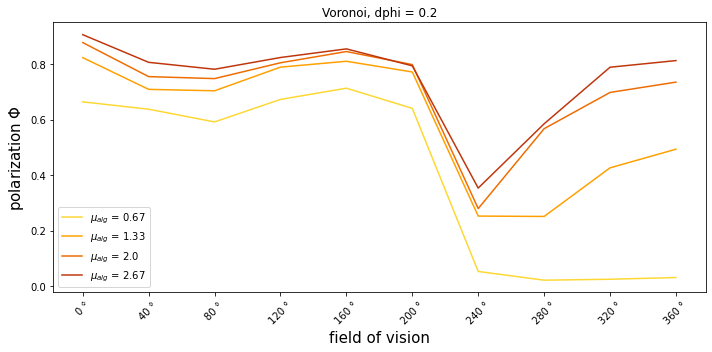

In [12]:
pol = np.load("/home/lars/vmodel_output/longsim_visPrey_astr_vor_pol_astr_visPrey.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)

xticks = []



paraChange2_val = paraChange2_val.astype(int)
for i in range(steps):
    xticks.append(str(paraChange2_val[i])+" °")

pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

plt.plot(pol[2,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[2], 2)), color = "#FDD835")
plt.plot(pol[4,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[4], 2)), color = "#FFA000")
plt.plot(pol[6,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[6], 2)), color = "#EF6C00")
plt.plot(pol[8,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[8], 2)), color = "#BF360C")


plt.gcf().set_size_inches(10,5)
plt.legend()
plt.xlabel("field of vision", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("polarization $Φ$", fontsize = 15) # y-axis label with 
plt.xticks(np.arange(steps),xticks, rotation=45)
plt.title("Voronoi, dphi = 0.2")
plt.tight_layout()
plt.savefig("slice_vor_preyvis_pol.pdf",bbox_inches="tight")
                                                     
    

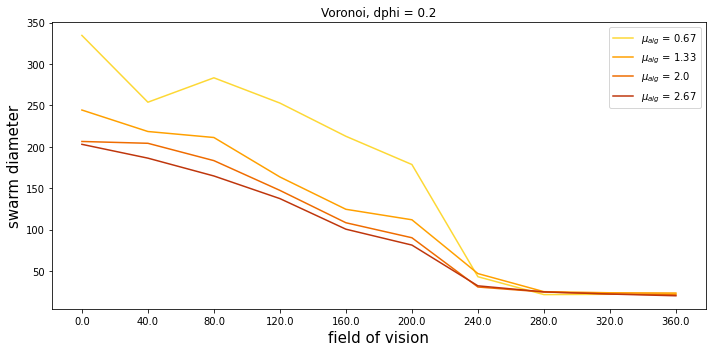

In [13]:
pol = np.load("/home/lars/vmodel_output/longsim_visPrey_astr_vor_maxSize_astr_visPrey.npy")

paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)

#pol = np.mean(pol, axis = 3)
pol = np.mean(pol, axis = 2)

plt.plot(pol[2,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[2], 2)), color = "#FDD835")
plt.plot(pol[4,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[4], 2)), color = "#FFA000")
plt.plot(pol[6,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[6], 2)), color = "#EF6C00")
plt.plot(pol[8,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[8], 2)), color = "#BF360C")


plt.gcf().set_size_inches(10,5)
plt.legend()
plt.xlabel("field of vision", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("swarm diameter", fontsize = 15) # y-axis label with 
plt.title("Voronoi, dphi = 0.2")
plt.xticks(range(steps), np.round(paraChange2_val,1))
plt.tight_layout()
plt.savefig("slice_vor_preyvis_size.pdf",bbox_inches="tight")
                                                     
    
    

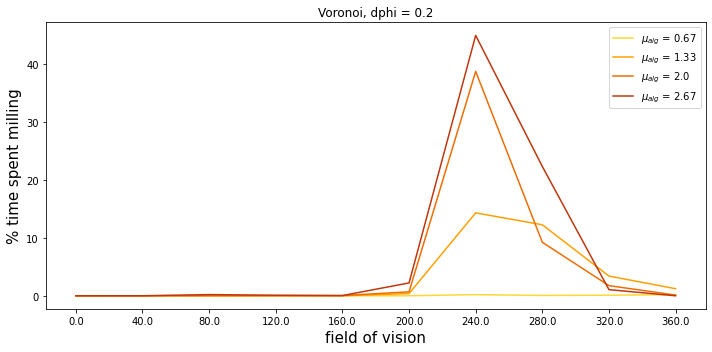

In [17]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_visPrey_astr_vor_mill_astr_visPrey.npy")
steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
        
pol = 100*mill_time_full

plt.plot(pol[2,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[2], 2)), color = "#FDD835")
plt.plot(pol[4,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[4], 2)), color = "#FFA000")
plt.plot(pol[6,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[6], 2)), color = "#EF6C00")
plt.plot(pol[8,:], label = "" + u'$μ_{alg}$' + " = "+str(round(paraChange1_val[8], 2)), color = "#BF360C")


plt.gcf().set_size_inches(10,5)
plt.legend()
plt.xlabel("field of vision", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("% time spent milling", fontsize = 15) # y-axis label with 
plt.title("Voronoi, dphi = 0.2")
plt.xticks(range(steps), np.round(paraChange2_val,1))
plt.tight_layout()
plt.savefig("slice_vor_preyvis_mill.pdf",bbox_inches="tight")
                                                     
    